## INTRO MACHINE LEARNING

---

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.
Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

Los objetivos de hoy son:

Buscar un conjunto de datos a analizar:
Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

Realizar un EDA sencillo para la variable dependiente y la variable independiente.


In [1]:
# ============================================
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings

pd.options.display.max_columns = None

In [20]:
df= pd.read_csv('../files/salesdaily.csv', index_col=0)

---

Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [21]:
df.shape

(2106, 12)

In [22]:
df.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
datum,,,,,,,,,,,,
1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2106 entries, 1/2/2014 to 10/8/2019
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   M01AB         2106 non-null   float64
 1   M01AE         2106 non-null   float64
 2   N02BA         2106 non-null   float64
 3   N02BE         2106 non-null   float64
 4   N05B          2106 non-null   float64
 5   N05C          2106 non-null   float64
 6   R03           2106 non-null   float64
 7   R06           2106 non-null   float64
 8   Year          2106 non-null   int64  
 9   Month         2106 non-null   int64  
 10  Hour          2106 non-null   int64  
 11  Weekday Name  2106 non-null   object 
dtypes: float64(8), int64(3), object(1)
memory usage: 213.9+ KB


In [25]:
df.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,5.033683,3.895830,3.880441,29.917095,8.853627,0.593522,5.512262,2.900198,2016.401235,6.344255,275.945869
std,2.737579,2.133337,2.384010,15.590966,5.605605,1.092988,6.428736,2.415816,1.665060,3.386954,1.970547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,190.000000
25%,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000,2015.000000,3.000000,276.000000
50%,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000,2016.000000,6.000000,276.000000
75%,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000,2018.000000,9.000000,276.000000
max,17.340000,14.463000,16.000000,161.000000,54.833333,9.000000,45.000000,15.000000,2019.000000,12.000000,276.000000


In [26]:
df.describe(include='object')

,Weekday Name
count,2106
unique,7
top,Thursday
freq,301


In [28]:
df.duplicated().sum()

0

In [29]:
numericas = df.select_dtypes(include= np.number)

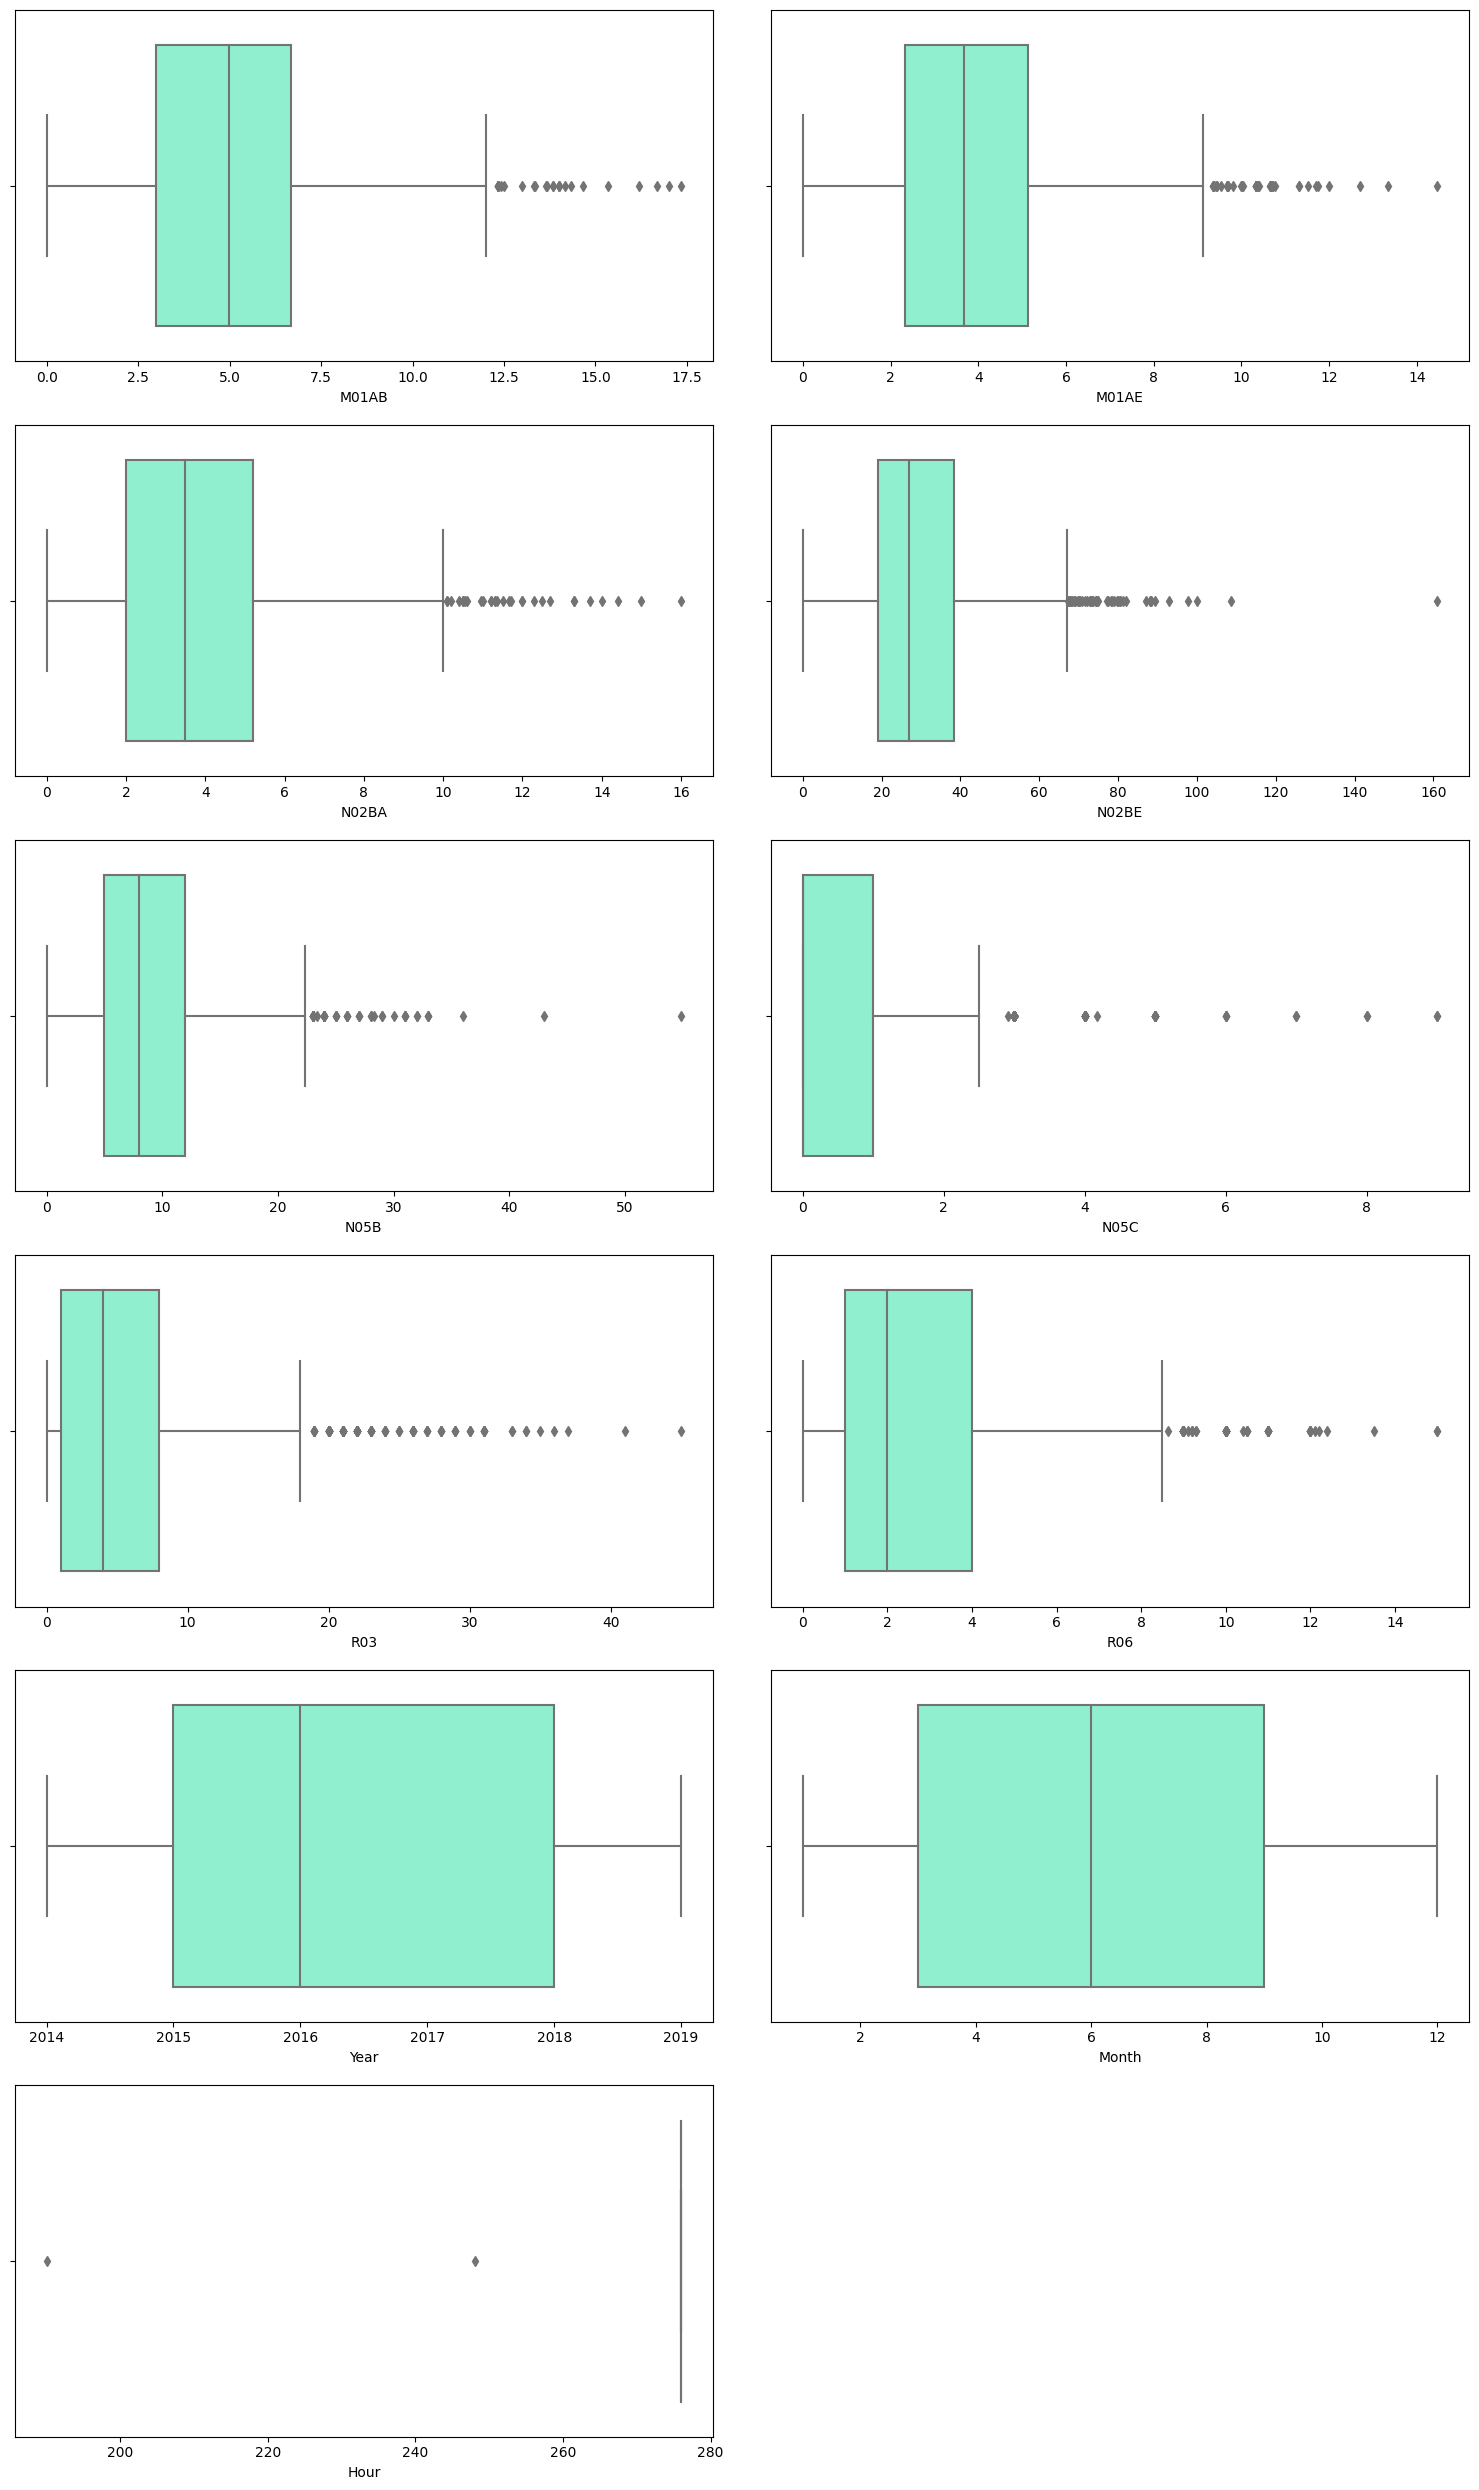

In [32]:
fig, axes = plt.subplots(6, 2, figsize=(15,25))
axes = axes.flat
for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

KeyError: "['MEDV'] not found in axis"

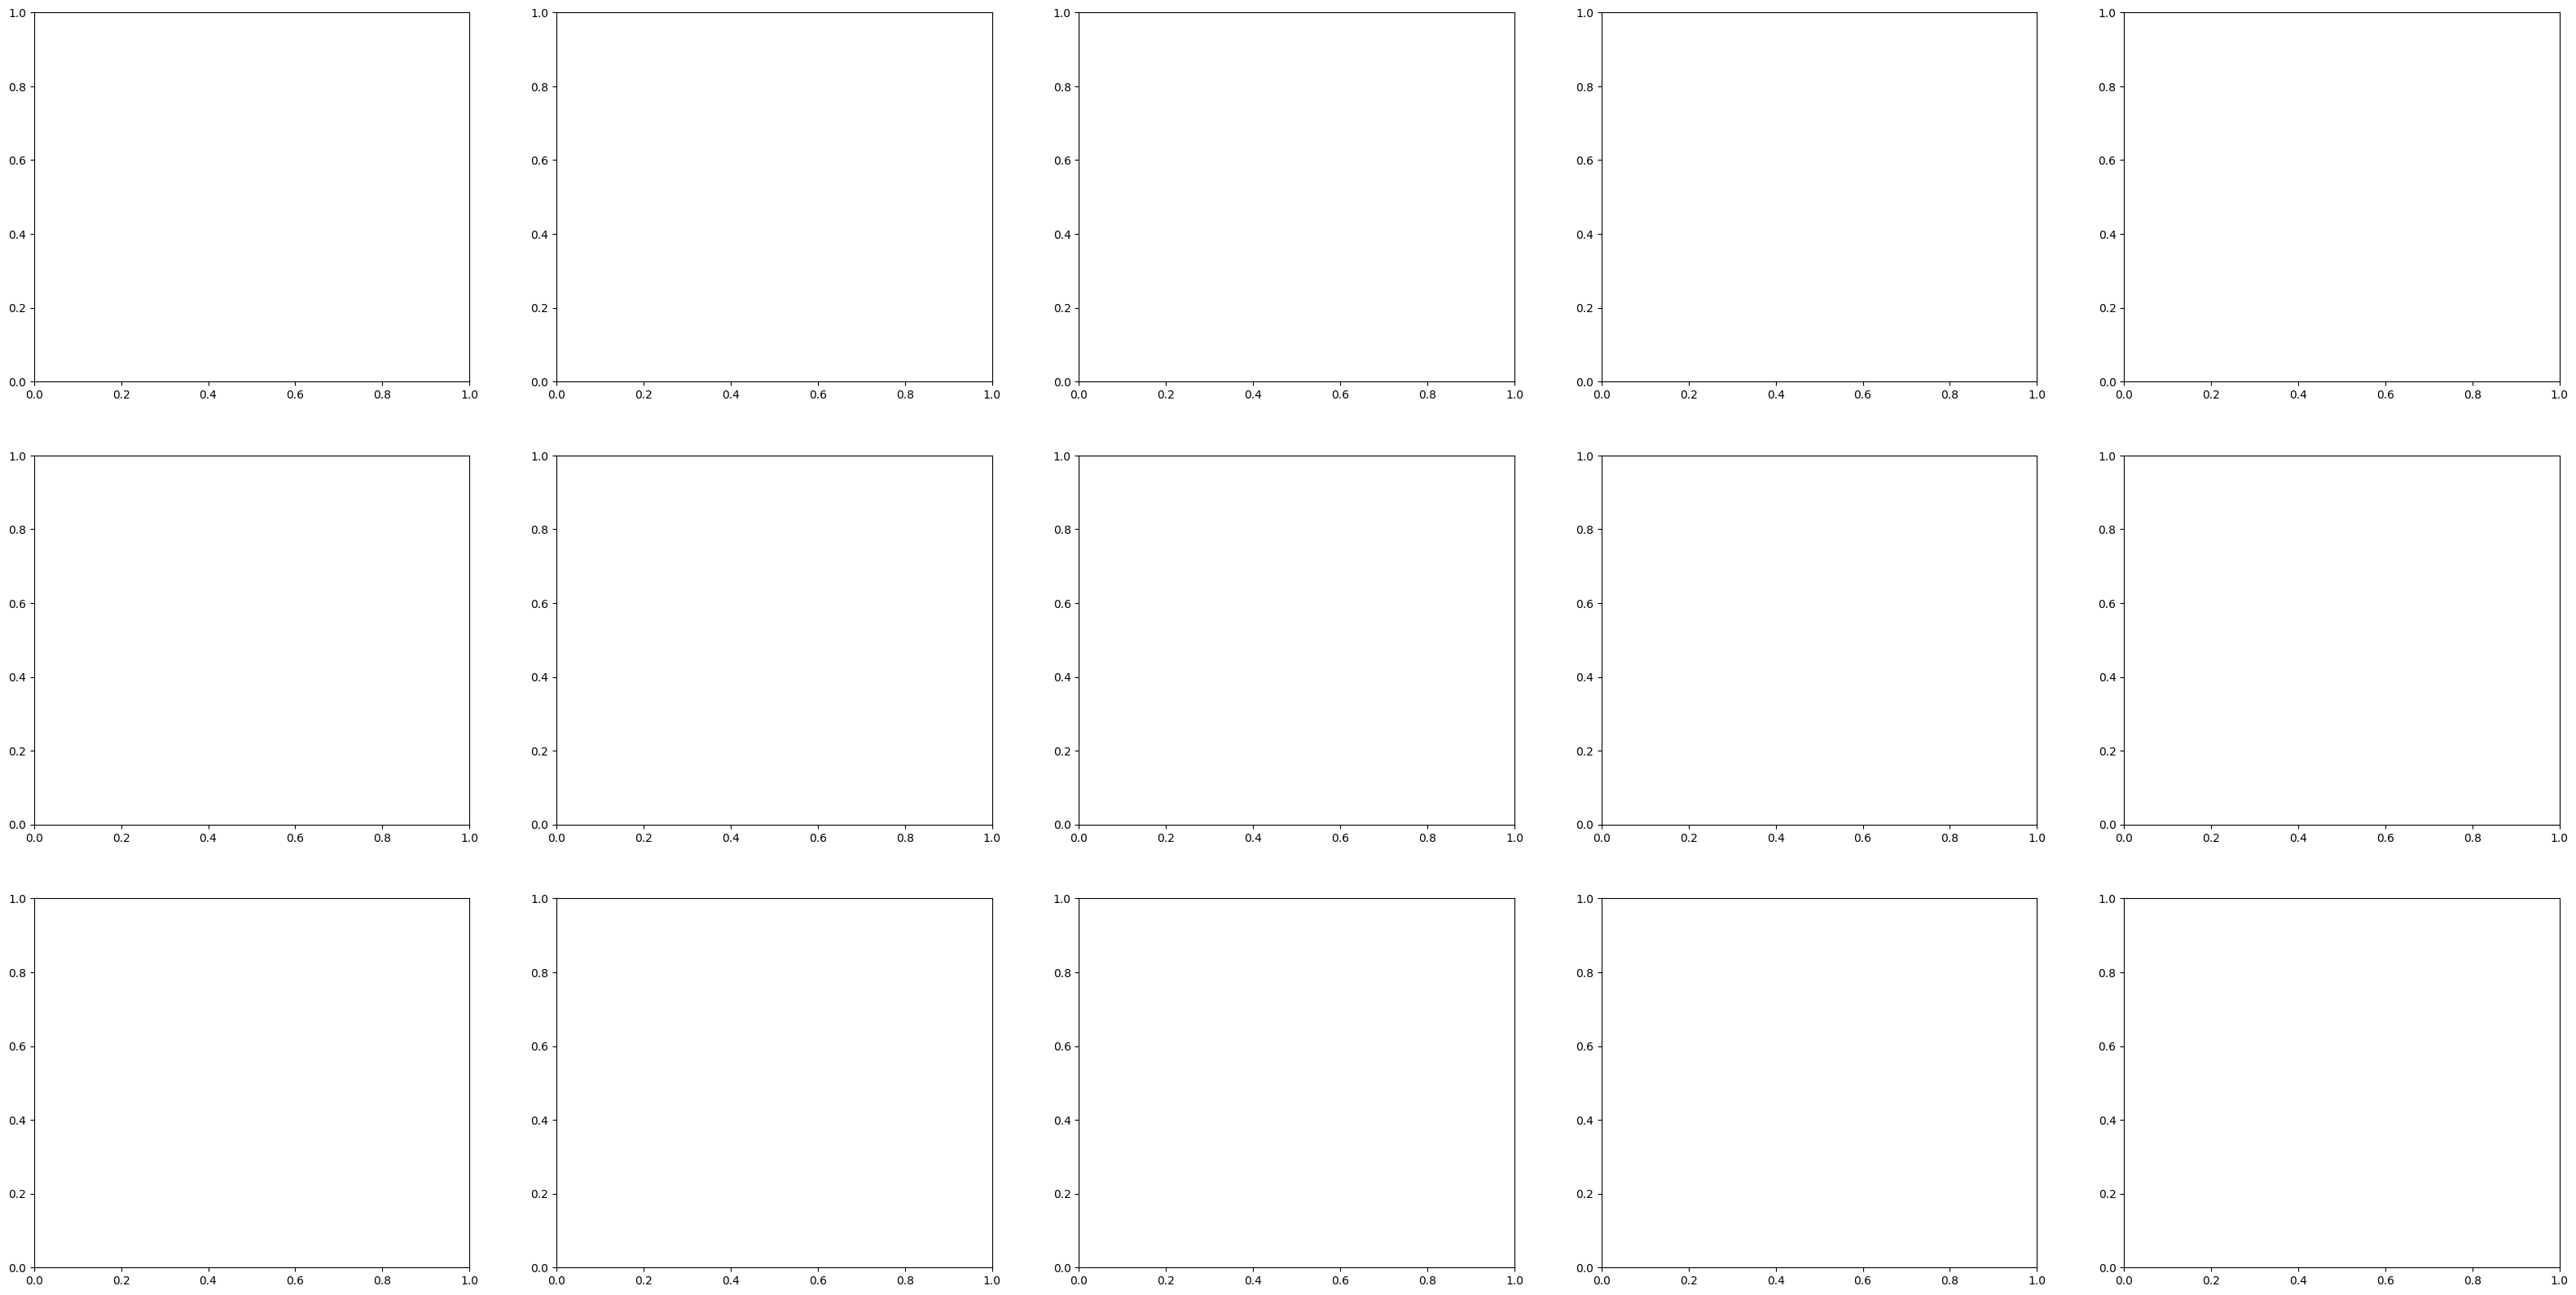

In [33]:
fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (40, 20))
axes = axes.flat
columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("MEDV")
for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data = df,
        x = colum,
        kde = True,
        color = "red",
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3]);

---

Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
Esto se hace para que comprendais mejor los datos con los que estais trabajando.

In [34]:
df.columns

Index(['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06',
       'Year', 'Month', 'Hour', 'Weekday Name'],
      dtype='object')

Columnas:


- M01AB = Productos antiinflamatorios y antirreumáticos, no esteroideos, derivados del ácido acético y sustancias afines
- M01AE = Productos antiinflamatorios y antirreumáticos, no esteroideos, derivados del ácido propiónico
- N02BA = Otros analgésicos y antipiréticos, Ácido salicílico y derivados
- N02BE/B = Otros analgésicos y antipiréticos, Pirazolonas y anilidas
- N05B =  Psicolépticos, ansiolíticos
- N05C =  Psicolépticos, Hipnóticos y sedantes
- R03 =  Medicamentos para enfermedades obstructivas de las vías respiratorias
- R06 = Antihistamínicos de uso sistémico
- Year = Año
- Month = Mes
- Hour = Hora
- Weekday Name = Nombre del dia.


In [36]:
df.corr()

/var/folders/db/hp0l5_js4yv8br5y2tc3frpm0000gn/T/ipykernel_4215/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour
M01AB,1.000000,0.189982,0.147483,0.179634,0.030208,0.015622,0.082835,0.088195,0.096797,0.015507,0.048035
M01AE,0.189982,1.000000,0.170372,0.291562,0.062396,0.026344,0.094250,0.031663,0.015697,-0.055144,0.021763
N02BA,0.147483,0.170372,1.000000,0.213752,0.175076,0.057120,0.037384,-0.026420,-0.232800,-0.094797,0.030759
N02BE,0.179634,0.291562,0.213752,1.000000,0.073080,0.002461,0.222892,-0.128520,-0.001533,0.022918,-0.020201
N05B,0.030208,0.062396,0.175076,0.073080,1.000000,0.246728,0.040026,-0.063704,-0.141072,0.011428,-0.038994
N05C,0.015622,0.026344,0.057120,0.002461,0.246728,1.000000,0.009548,-0.004443,0.008499,-0.013385,-0.023014
R03,0.082835,0.094250,0.037384,0.222892,0.040026,0.009548,1.000000,0.007132,0.184407,-0.015006,0.017115
R06,0.088195,0.031663,-0.026420,-0.128520,-0.063704,-0.004443,0.007132,1.000000,0.185241,-0.140709,0.027405
Year,0.096797,0.015697,-0.232800,-0.001533,-0.141072,0.008499,0.184407,0.185241,1.000000,-0.084987,-0.022624
Month,0.015507,-0.055144,-0.094797,0.022918,0.011428,-0.013385,-0.015006,-0.140709,-0.084987,1.000000,-0.011727
